In [12]:
import math

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pyclesperanto_prototype as cle
from skimage import img_as_ubyte, io

In [27]:
# Variables de configuración
img = "img/cristal.png" # Ruta de la imagen de la microscopía
it_er = 3 # Iteraciones de erosión
it_dil = 1 # Iteraciones de dilatación
M = 100 # Aumento de la microscopía (ej. 500x)

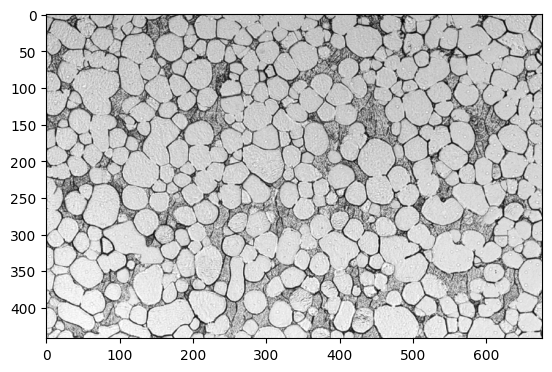

In [28]:
img_orig = img_as_ubyte(io.imread(img, as_gray=True))
plt.imshow(img_orig, cmap="gray")

# Otro método

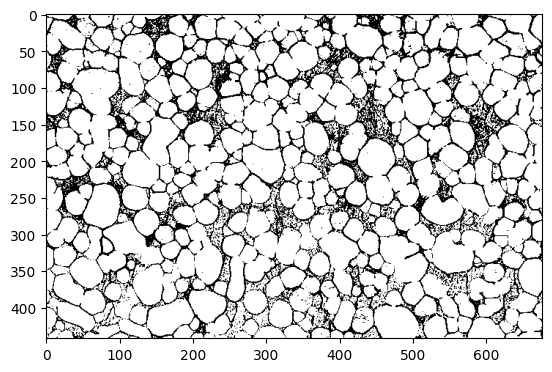

In [29]:
# OTSU
ret, th = cv2.threshold(img_orig, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(cv2.cvtColor(th, cv2.COLOR_BGR2RGB))

# Erosión

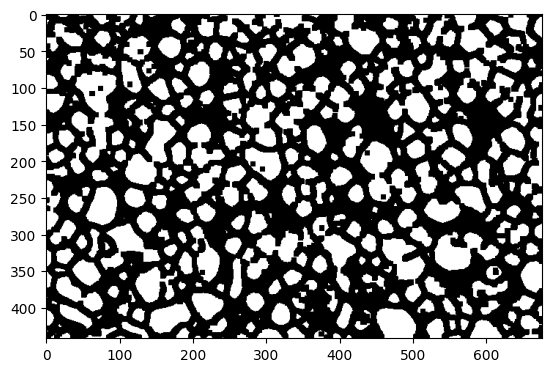

In [30]:
# Proceso de erosión
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(th, kernel, iterations=it_er)
plt.imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))

# Dilatación

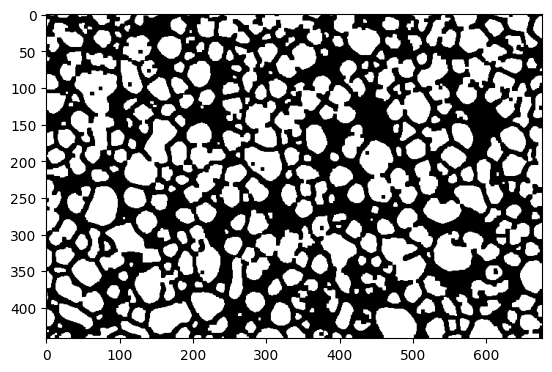

In [31]:
# Proceso de dilatación
dilatacion = cv2.dilate(erosion, kernel, iterations=it_dil)
plt.imshow(cv2.cvtColor(dilatacion, cv2.COLOR_BGR2RGB))

Conteo:  309.0
Conteo en centro:  238.0
Conteo en bordes:  35.5
N:  273.5


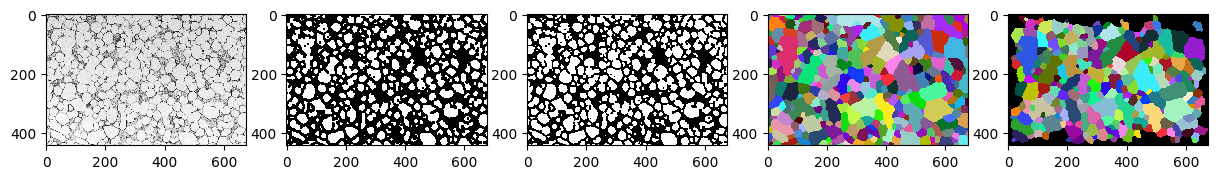

In [32]:
voronoi = cle.voronoi_labeling(dilatacion)
sin_bordes = cle.exclude_labels_on_edges(voronoi)

fig, axs = plt.subplots(1, 5, figsize=(15, 15))

n_granos = cle.maximum_of_all_pixels(voronoi)
print("Conteo: ", n_granos)

n_granos_centro = cle.maximum_of_all_pixels(sin_bordes)
print("Conteo en centro: ", n_granos_centro)

n_granos_bordes = (n_granos - n_granos_centro)/2
print("Conteo en bordes: ", n_granos_bordes)

N = n_granos_centro + n_granos_bordes
print("N: ", N)



cle.imshow(img_orig, plot=axs[0])
cle.imshow(erosion, plot=axs[1])
cle.imshow(dilatacion, plot=axs[2])
cle.imshow(voronoi, plot=axs[3], labels=True)
cle.imshow(sin_bordes, plot=axs[4], labels=True)

In [33]:
# Transformación por magnificación

pulg_transf = 1.0 * (100 / M)**2  # Transformación de 1 pulg2 a 100x a la magnificación usada (M)
N_transf = N / pulg_transf

print("N: ", N)
print(f"Magnificación: {M}x")

G = round(((math.log10(N_transf)/math.log10(2))) + 1, 2)
print("G: ", G)

N:  273.5
Magnificación: 100x
G:  9.1
